In [26]:
import sqlite3
import pandas as pd

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pd.read_sql(salary_query, conn)
team_salaries.head()

yearID  total_payroll
0    1985    134401120.0
1    1986    157716444.0
2    1987    136088747.0
3    1988    157049812.0
4    1989    188771688.0

Part 1: Wrangling

The data you need to answer these questions is in the Salaries and Teams tables of the database.

Problem 1


Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).


Include the SQL code you used to create this relation in your writeup. Describe how you dealt with any missing data in these two relations. Specifically, indicate if there is missing data in either table, and how the type of join you used determines how you dealt with this missing data. One note, for SQL you have to be mindful of integer vs. float division.

In [27]:
salary_table_q = "SELECT * FROM Salaries"
team_table_q = "SELECT * FROM Teams"
salary_table= pd.read_sql(salary_table_q, conn)
team_table = pd.read_sql(team_table_q, conn)
#salary_table, Teams
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(salary_table)
# SELECT yearID, teamID, sum(salary) AS total_payroll FROM Salary GROUP BY yearID, TEAMID


yearID teamID lgID   playerID      salary
0        1985    ATL   NL  barkele01    870000.0
1        1985    ATL   NL  bedrost01    550000.0
2        1985    ATL   NL  benedbr01    545000.0
3        1985    ATL   NL   campri01    633333.0
4        1985    ATL   NL  ceronri01    625000.0
5        1985    ATL   NL  chambch01    800000.0
6        1985    ATL   NL  dedmoje01    150000.0
7        1985    ATL   NL  forstte01    483333.0
8        1985    ATL   NL  garbege01    772000.0
9        1985    ATL   NL  harpete01    250000.0
10       1985    ATL   NL  hornebo01   1500000.0
11       1985    ATL   NL  hubbagl01    455000.0
12       1985    ATL   NL  mahleri01    407500.0
13       1985    ATL   NL  mcmurcr01    275000.0
14       1985    ATL   NL  mumphje01    775000.0
15       1985    ATL   NL  murphda05   1625000.0
16       1985    ATL   NL  oberkke01    616667.0
17       1985    ATL   NL  perezpa01    450000.0
18       1985    ATL   NL  perryge01    120000.0
19       1985    ATL   NL  ramirra01    750000.0
20       1985    ATL   NL  suttebr01   1354167.0
21       1985    ATL   NL  washicl01    800000.0
22       1985    BAL   AL  boddimi01    625000.0
23       1985    BAL   AL  dauerri01    480000.0
24       1985    BAL   AL  davisst02    437500.0
25       1985    BAL   AL  dempsri01    512500.0
26       1985    BAL   AL  dwyerji01    375000.0
27       1985    BAL   AL  flanami01    641667.0
28       1985    BAL   AL   fordda01    450000.0
29       1985    BAL   AL  grosswa01    483333.0
30       1985    BAL   AL   lacyle01    725000.0
31       1985    BAL   AL   lynnfr01   1090000.0
32       1985    BAL   AL  martide01    560000.0
33       1985    BAL   AL  martiti01    440000.0
34       1985    BAL   AL  mcgresc01    547143.0
35       1985    BAL   AL  murraed02   1472819.0
36       1985    BAL   AL  nolanjo01    341667.0
37       1985    BAL   AL  rayfofl01    128500.0
38       1985    BAL   AL  ripkeca01    800000.0
39       1985    BAL   AL  roeniga01    558333.0
40       1985    BAL   AL  sheetla01     60000.0
41       1985    BAL   AL  shelbjo01    130000.0
42       1985    BAL   AL  stewasa01    581250.0
43       1985    BAL   AL  youngmi01    121000.0
44       1985    BOS   AL  armasto01    915000.0
45       1985    BOS   AL  barrema02    272500.0
46       1985    BOS   AL  boggswa01   1000000.0
47       1985    BOS   AL  bordiri01    115000.0
48       1985    BOS   AL   boydoi01    177500.0
49       1985    BOS   AL  bucknbi01    747500.0
50       1985    BOS   AL  clearma01    580000.0
51       1985    BOS   AL  clemero02    140000.0
52       1985    BOS   AL  crawfst01    160000.0
53       1985    BOS   AL  easlemi01    650000.0
54       1985    BOS   AL  evansdw01    800000.0
55       1985    BOS   AL  gedmari01    477500.0
56       1985    BOS   AL  gutieja01    130000.0
57       1985    BOS   AL  hoffmgl01    335000.0
58       1985    BOS   AL  hurstbr01    300000.0
59       1985    BOS   AL  juraked01    125000.0
60       1985    BOS   AL  kisonbr01    370000.0
61       1985    BOS   AL  milleri01    275000.0
62       1985    BOS   AL  nichore01    260000.0
63       1985    BOS   AL  nippeal01    165000.0
64       1985    BOS   AL  ojedabo01    240000.0
65       1985    BOS   AL   remyje01    483333.0
66       1985    BOS   AL   riceji01    779227.0
67       1985    BOS   AL  stanlbo01   1075000.0
68       1985    BOS   AL  staplda01    325000.0
69       1985    CAL   AL  beniqju01    365000.0
70       1985    CAL   AL  boonebo01    883000.0
71       1985    CAL   AL  burleri01    856667.0
72       1985    CAL   AL  candejo01    612500.0
73       1985    CAL   AL  carewro01    875000.0
74       1985    CAL   AL  clibust02     60000.0
75       1985    CAL   AL  corbedo01    360000.0
76       1985    CAL   AL  decindo01   1100000.0
77       1985    CAL   AL  downibr01    808333.0
78       1985    CAL   AL  forscke01    633333.0
79       1985    CAL   AL  grichbo01    700000.0
80       1985    CAL   AL  hendrge01  

In [28]:
# total payroll for each team in each year
salary_for_each_team_year_p = "SELECT yearID, teamID, sum(salary) AS total_payroll FROM Salaries GROUP BY teamID, yearID"
salary_for_each_team_year_table = pd.read_sql(salary_for_each_team_year_p, conn)
#display(salary_for_each_team_year_table)

# winrate for each team in each year

win_rate_for_each_team_year_p = "SELECT yearID, teamID, franchID, G, W, (CAST(W AS float )/CAST(G AS float)) AS win_rate FROM Teams GROUP BY teamID, yearID"
win_rate_for_each_team_year_table = pd.read_sql(win_rate_for_each_team_year_p, conn)
#display(win_rate_for_each_team_year_table)

"WITH payroll_table(yearID, teamID,total_payroll) as (SELECT yearID, teamID, sum(salary) AS total_payroll FROM Salaries GROUP BY teamID, yearID), "
"WITH Team_table(yearID, teamID, franchID, G, W, win_rate) as (SELECT yearID, teamID, franchID, G, W, (CAST(W AS float )/CAST(G AS float)) AS win_rate FROM Teams GROUP BY teamID, yearID) "
"SELECT Team_table.yearID, Team_table_teamID, franchID, G, W, win_rate, total_payroll FROM payroll_table, Team_table WHERE Team_table.yearID = payroll_table.yearID AND Team_table.teamID = payroll_table.teamID" 
"""
# salary_win_rate_p = "WITH payroll_table(yearID, teamID, total_payroll) AS (SELECT yearID, teamID, sum(salary) AS total_payroll FROM Salaries GROUP BY teamID, yearID) SELECT Teams.yearID, Teams.teamID, franchID, G, W, (CAST(W AS float )/CAST(G AS float)) AS win_rate, total_payroll FROM Teams, payroll_table WHERE Teams.teamID = payroll_table.teamID AND Teams.yearID = payroll_table.yearID"
salary_win_rate_p = "WITH payroll_table(yearID, teamID, total_payroll) AS (SELECT yearID, teamID, sum(salary) AS total_payroll FROM Salaries GROUP BY teamID, yearID), WITH Teams_table (yearID, teamID, franchID, G, W, win_rate) AS (SELECT yearID, teamID, franchID, G, W, (CAST(W AS float)/CAST(G AS float)) AS win_rate FROM Teams GROUP BY teamID, yearID) SELECT Teams_table.yearID, Teams_table.teamID, franchID, G, W, win_rate, total_payroll FROM Teams_table, payroll_table WHERE Teams_table.teamID = payroll_table.teamID AND Teams_table.yearID = payroll_table.yearID"
salary_win_rate_table = pd.read_sql(salary_win_rate_p, conn)
display(salary_win_rate_table)
"""

salary_win_rate_p = "WITH payroll_table(yearID, teamID,total_payroll) as (SELECT yearID, teamID, sum(salary) AS total_payroll FROM Salaries GROUP BY teamID, yearID), Team_table(yearID, teamID, franchID, G, W, win_rate) as (SELECT yearID, teamID, franchID, G, W, (CAST(W AS float )/CAST(G AS float)) AS win_rate FROM Teams GROUP BY teamID, yearID) SELECT Team_table.yearID, Team_table.teamID, franchID, G, W, win_rate, total_payroll FROM payroll_table, Team_table WHERE Team_table.yearID = payroll_table.yearID AND Team_table.teamID = payroll_table.teamID"
salary_win_rate_table = pd.read_sql(salary_win_rate_p, conn)
display(salary_win_rate_table)

yearID teamID franchID    G    W  win_rate  total_payroll
0      1985    ATL      ATL  162   66  0.407407     14807000.0
1      1985    BAL      BAL  161   83  0.515528     11560712.0
2      1985    BOS      BOS  163   81  0.496933     10897560.0
3      1985    CAL      ANA  162   90  0.555556     14427894.0
4      1985    CHA      CHW  163   85  0.521472      9846178.0
5      1985    CHN      CHC  162   77  0.475309     12702917.0
6      1985    CIN      CIN  162   89  0.549383      8359917.0
7      1985    CLE      CLE  162   60  0.370370      6551666.0
8      1985    DET      DET  161   84  0.521739     10348143.0
9      1985    HOU      HOU  162   83  0.512346      9993051.0
10     1985    KCA      KCR  162   91  0.561728      9321179.0
11     1985    LAN      LAD  162   95  0.586420     10967917.0
12     1985    MIN      MIN  162   77  0.475309      5764821.0
13     1985    ML4      MIL  161   71  0.440994     11284107.0
14     1985    MON      WSN  161   84  0.521739      9470166.0
15     1985    NYA      NYY  161   97  0.602484     14238204.0
16     1985    NYN      NYM  162   98  0.604938     10834762.0
17     1985    OAK      OAK  162   77  0.475309      9058606.0
18     1985    PHI      PHI  162   75  0.462963     10124966.0
19     1985    PIT      PIT  161   57  0.354037      9227500.0
20     1985    SDN      SDP  162   83  0.512346     11036583.0
21     1985    SEA      SEA  162   74  0.456790      4613000.0
22     1985    SFN      SFG  162   62  0.382716      8221714.0
23     1985    SLN      STL  162  101  0.623457     11817083.0
24     1985    TEX      TEX  161   62  0.385093      7676500.0
25     1985    TOR      TOR  161   99  0.614907      8812550.0
26     1986    ATL      ATL  161   72  0.447205     17102786.0
27     1986    BAL      BAL  162   73  0.450617     13001258.0
28     1986    BOS      BOS  161   95  0.590062     14402239.0
29     1986    CAL      ANA  162   92  0.567901     14427258.0
30     1986    CHA      CHW  162   72  0.444444     10418819.0
31     1986    CHN      CHC  160   70  0.437500     17208165.0
32     1986    CIN      CIN  162   86  0.530864     11906388.0
33     1986    CLE      CLE  163   84  0.515337      7809500.0
34     1986    DET      DET  162   87  0.537037     12335714.0
35     1986    HOU      HOU  162   96  0.592593      9873276.0
36     1986    KCA      KCR  162   76  0.469136     13043698.0
37     1986    LAN      LAD  162   73  0.450617     14913776.0
38     1986    MIN      MIN  162   71  0.438272      8748167.0
39     1986    ML4      MIL  161   77  0.478261      9943642.0
40     1986    MON      WSN  161   78  0.484472     11103600.0
41     1986    NYA      NYY  162   90  0.555556     18494253.0
42     1986    NYN      NYM  162  108  0.666667     15393714.0
43     1986    OAK      OAK  162   76  0.469136      9779421.0
44     1986    PHI      PHI  161   86  0.534161     11590166.0
45     1986    PIT      PIT  162   64  0.395062     10843500.0
46     1986    SDN      SDP  162   74  0.456790     11380693.0
47     1986    SEA      SEA  162   67  0.413580      5958309.0
48     1986    SFN      SFG  162   83  0.512346      8947000.0
49     1986    SLN      STL  161   79  0.490683      9875010.0
50     1986    TEX      TEX  162   87  0.537037      6743119.0
51     1986    TOR      TOR  163   86  0.527607     12611047.0
52     1987    ATL      ATL  161   69  0.428571     16544560.0
53     1987    BAL      BAL  162   67  0.413580     13900273.0
54     1987    BOS      BOS  162   78  0.481481     10144167.0
55     1987    CAL      ANA  162   75  0.462963     12843499.0
56     1987    CHA      CHW  162   77  0.475309     10641843.0
57     1987    CHN      CHC  161   76  0.472050     14307999.0
58     1987    CIN      CIN  162   84  0.518519      9281500.0
59     1987    CLE      CLE  162   61  0.376543      8513750.0
60     1987    DET      DET  162   98  0.604938     12122881.0
61     1987    HOU      HOU  162   76  0.469136     12608371.0
62     1987    KCA      KCR  162   8

Part 2: Exploratory Data Analysis


Problem 2


Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014).

Question 1


What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, etc.

Problem 3


Write code to produce plots that specifically show at least one of the statements you made in Question 1. For example, if you make a statement that there is a trend for payrolls to decrease over time, make a plot of a statistic for central tendency (e.g., mean payroll) vs. time to show that specficially.

<AxesSubplot: xlabel='yearID', ylabel='total_payroll'>

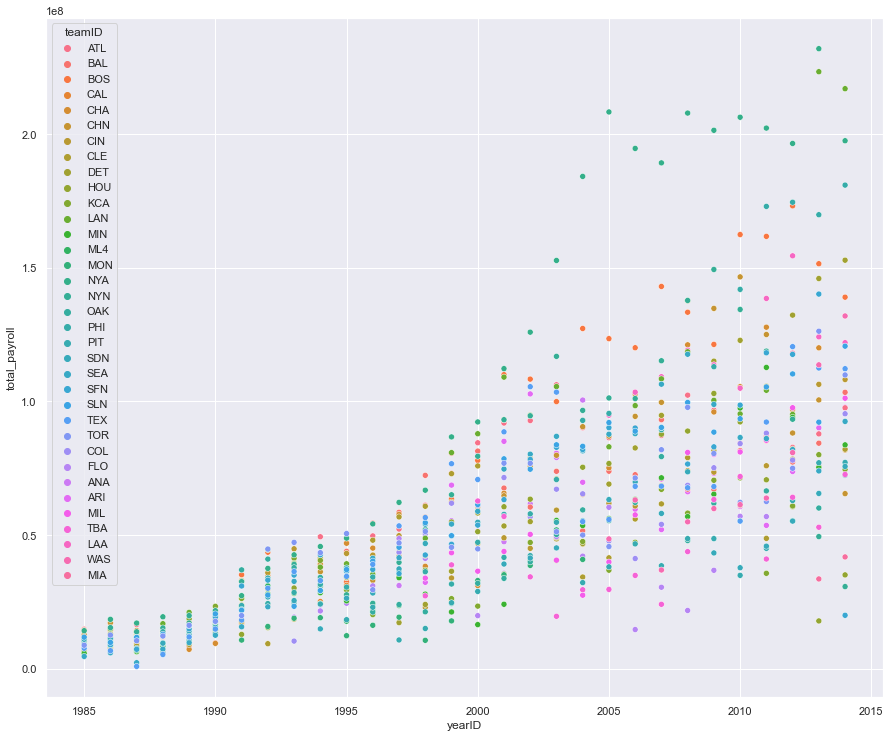

In [29]:
# Problem 2: 
"""
import matplotlib.pyplot as plt
plt.scatter(salary_win_rate_table["yearID"], salary_win_rate_table["total_payroll"])
plt.show()
"""

import seaborn

seaborn.set(style='whitegrid')
#salary_win_rate_table_seaborn = seaborn.load_dataset(salary_win_rate_table)
seaborn.set(rc={'figure.figsize':(15,12.5)})
seaborn.scatterplot(x="yearID",
                    y="total_payroll",
                    hue="teamID",
                    #style="event",
                    data=salary_win_rate_table)

Question 1: 
    
From the graph, I can see that as the year growth, most of the time, the mean of total payroll increase over years. Also, as the year growth, the total payroll for each team becomes more and more diverse which means the variance of total payroll keep growing year by year. 


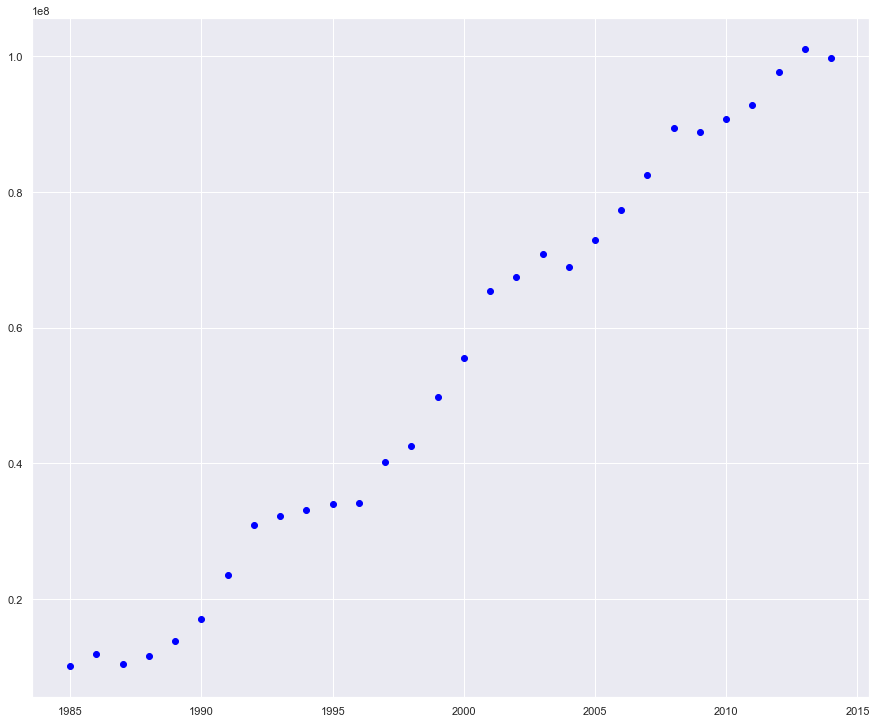

In [30]:
# Problem 3:
dfs = dict(tuple(salary_win_rate_table.groupby("yearID")))
#display(dfs[1985])


keys = dfs.keys()
total_pay_each_year = []
for i in keys: 
    temp_table = dfs[i]
    sum_of_each_year = 0 
    row_num = 0
    for index, row in temp_table.iterrows(): 
        sum_of_each_year += row["total_payroll"]
        row_num +=1
    total_pay_each_year.append(sum_of_each_year/row_num)
#print(keys)
#print(total_pay_each_year)

#seaborn.scatterplot
import matplotlib.pyplot as plt
plt.scatter(keys,total_pay_each_year, c = "blue")
plt.show()

Problem 4


Write code to discretize year into five time periods (you can use pandas.cut to accomplish this) and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods. You could add a regression line (using, e.g., NumPy's polyfit) in each scatter plot to ease interpretation.


In [31]:
# step 1 load the data into a dataframe
# use cut to set labels
# use seaborn to draw lines

#df_table = pd.DataFrame({"year":keys, "mean_payroll" :total_pay_each_year}, columns = ["year","mean_payroll"])
#df_table
#
sw_table = salary_win_rate_table.copy()

#sw_table["year_catergories"] = pd.cut(x = sw_table.yearID, 5 , labels = ["c1","c2","c3","c4","c5"])
#sw_table["year_catergories"] = sw_table.cut(x = sw_table['yearID'])
sw_table["year_catergories"] = pd.cut(x = sw_table["yearID"], bins = 5 , labels = ["c1","c2","c3","c4","c5"])
catergories_table = dict(tuple(sw_table.groupby("teamID")))
team_key = catergories_table.keys()
each_team_each_catergories = []
#print(team_key)
for i in team_key:
    #print(i)
    t_table = catergories_table[i]
    temp_table = dict(tuple(t_table.groupby("year_catergories")))
    #display(temp_table)
    temp_key = temp_table.keys()
    #each_team_catergories = []
    for j in temp_key: 
        tt_table = temp_table[j]
        sum_of_each_year = 0 
        sum_of_win_rate = 0
        row_num = 0
        if tt_table.empty: 
            continue
        else: 
            for index, row in tt_table.iterrows(): 
                sum_of_each_year += row["total_payroll"]
                sum_of_win_rate += row["win_rate"]
                row_num +=1
        #each_team_catergories.append([tt_table["teamID"].unique()[0],sum_of_each_year/row_num,sum_of_win_rate/row_num,j])
        each_team_each_catergories.append([tt_table["teamID"].unique()[0],sum_of_each_year/row_num,sum_of_win_rate/row_num,j])
    #each_team_each_catergories.append(each_team_catergories)
#print(each_team_each_catergories)
Table_catergories = pd.DataFrame(each_team_each_catergories, columns = ["teamID", "avg_payroll", "avg_winrate", "year_catergories"])
display(Table_catergories)
#display(catergories_table)

teamID   avg_payroll  avg_winrate year_catergories
0      ANA  4.808761e+07     0.509259               c3
1      ANA  8.978317e+07     0.521605               c4
2      ARI  7.399637e+07     0.543210               c3
3      ARI  6.512023e+07     0.473251               c4
4      ARI  7.487867e+07     0.468107               c5
5      ATL  1.447506e+07     0.402204               c1
6      ATL  4.016462e+07     0.606874               c2
7      ATL  7.599148e+07     0.611757               c3
8      ATL  9.378281e+07     0.537037               c4
9      ATL  8.941050e+07     0.550412               c5
10     BAL  1.165826e+07     0.454036               c1
11     BAL  3.461313e+07     0.513848               c2
12     BAL  7.016973e+07     0.472222               c3
13     BAL  7.206197e+07     0.442373               c4
14     BAL  8.319692e+07     0.486626               c5
15     BOS  1.456336e+07     0.528902               c1
16     BOS  3.810113e+07     0.509074               c2
17     BOS  7.669258e+07     0.539619               c3
18     BOS  1.245444e+08     0.581276               c4
19     BOS  1.515487e+08     0.525720               c5
20     CAL  1.507731e+07     0.517490               c1
21     CAL  3.025251e+07     0.460688               c2
22     CHA  9.008958e+06     0.481840               c1
23     CHA  3.634355e+07     0.539121               c2
24     CHA  4.592250e+07     0.508237               c3
25     CHA  8.733539e+07     0.533389               c4
26     CHA  1.047005e+08     0.480453               c5
27     CHN  1.360505e+07     0.484439               c1
28     CHN  3.187770e+07     0.481296               c2
29     CHN  5.938039e+07     0.457251               c3
30     CHN  9.498366e+07     0.519138               c4
31     CHN  1.101254e+08     0.441888               c5
32     CIN  1.064637e+07     0.527305               c1
33     CIN  3.895822e+07     0.521192               c2
34     CIN  4.127323e+07     0.490627               c3
35     CIN  6.190262e+07     0.456329               c4
36     CIN  8.634879e+07     0.525720               c5
37     CLE  9.232153e+06     0.444943               c1
38     CLE  2.701746e+07     0.530591               c2
39     CLE  7.308722e+07     0.542731               c3
40     CLE  5.351358e+07     0.510288               c4
41     CLE  7.131895e+07     0.472222               c5
42     COL  2.714384e+07     0.478410               c2
43     COL  5.758062e+07     0.473251               c3
44     COL  5.739889e+07     0.461366               c4
45     COL  8.257637e+07     0.465021               c5
46     DET  1.340266e+07     0.509796               c1
47     DET  3.187333e+07     0.451812               c2
48     DET  4.075933e+07     0.425689               c3
49     DET  8.003174e+07     0.455761               c4
50     DET  1.291326e+08     0.547811               c5
51     FLO  2.412546e+07     0.450225               c2
52     FLO  3.478576e+07     0.457295               c3
53     FLO  3.649865e+07     0.504652               c4
54     FLO  5.026924e+07     0.491770               c5
55     HOU  1.302006e+07     0.512346               c1
56     HOU  2.570889e+07     0.505632               c2
57     HOU  5.123595e+07     0.547325               c3
58     HOU  8.143331e+07     0.523650               c4
59     HOU  6.328399e+07     0.393004               c5
60     KCA  1.513236e+07     0.516448               c1
61     KCA  3.198588e+07     0.496268               c2
62     KCA  3.397583e+07     0.420021               c3
63     KCA  4.961067e+07     0.414609               c4
64     KCA  6.553976e+07     0.462963               c5
65     LAA  1.067019e+08     0.583333               c4
66     LAA  1.263107e+08     0.543210               c5
67     LAN  1.646631e+07     0.513336               c1
68     LAN  3.825651e+07     0.511493               c2
69     LAN  7.782399e+07     0.526749               c3
70     LAN  1.011673e+08     0.517490               c4
71     LAN  1.392470e+08     0.544763       

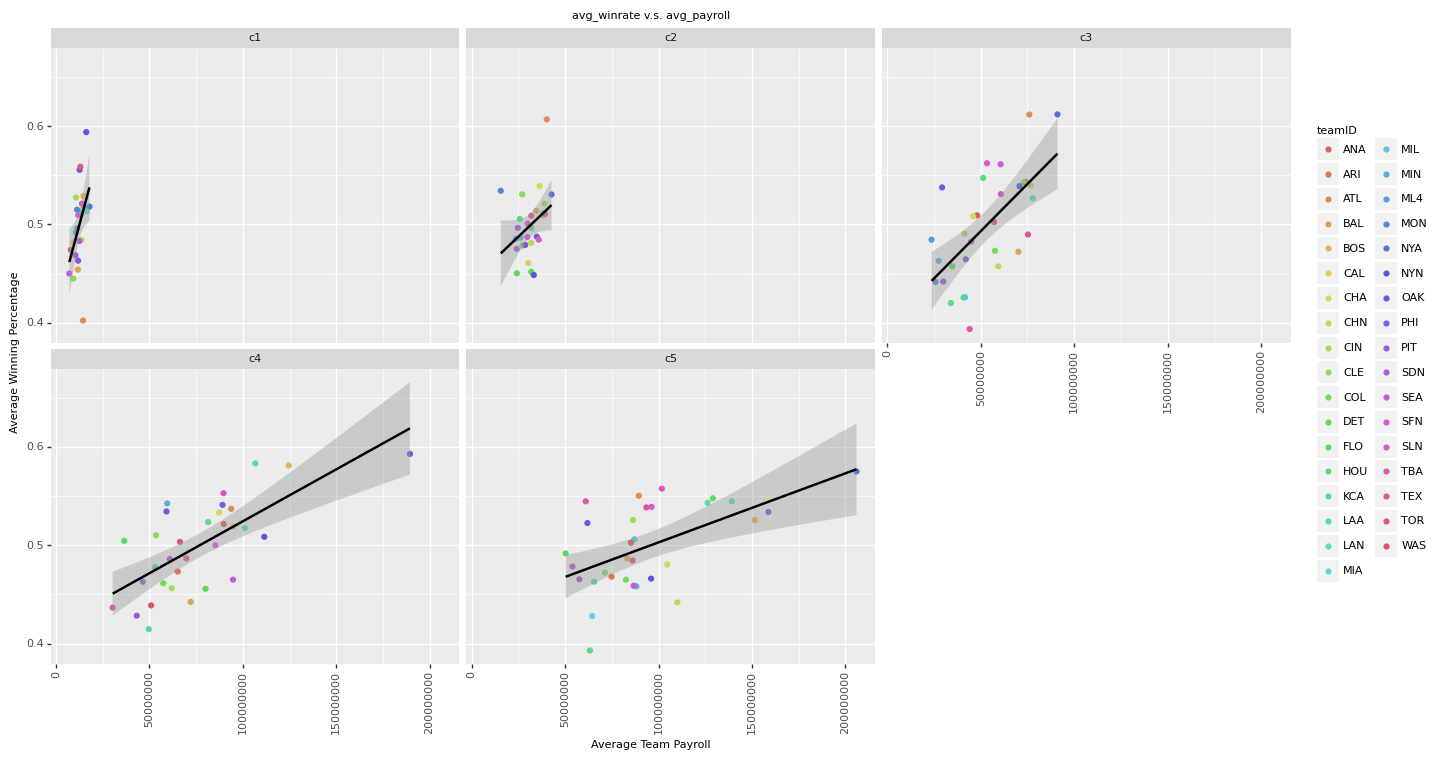

<ggplot: (91495980484)>

In [32]:
"""
seaborn.scatterplot(x="avg_payroll",
                    y="avg_winrate",
                    hue="teamID",
                    #style="event",
                    data=Table_catergories)
"""

"""
different_period_table = dict(tuple(Table_catergories.groupby("year_catergories")))
#display(different_period_table)
period_key = different_period_table.keys()

#print(period_key)
index = 0
fig, axs = plt.subplots(5)
for i in period_key: 
    seaborn.boxplot(x='avg_payroll', y='avg_winrate', hue="teamID", data=different_period_table[i],ax = axes[index])
    index+=1
"""
"""

sea = seaborn.FacetGrid(Table_catergories, col="year_catergories", hue="teamID")
sea.map(seaborn.scatterplot, "avg_payroll", "avg_winrate",alpha = 0.9)
#sea.map(seaborn.lmplot, "avg_payroll", "avg_winrate")
#sea.lmplot(x ="avg_payroll", y = "avg_winrate")
sea.add_legend()
#seaborn.lmplot(data = Table_catergories, x = "avg_payroll", y = "avg_winrate" ,col="year_catergories", hue="teamID")

seaborn.catplot(x="avg_payroll",
                    y="avg_winrate",
                    hue="teamID",
                    col="year_catergories",
                    #style="event",
                    data=Table_catergories)
import numpy as np
different_period_table = dict(tuple(Table_catergories.groupby("year_catergories")))
period_key = different_period_table.keys()
for i in period_key:
    z = np.polyfit(different_period_table[i]["avg_payroll"], different_period_table[i]["avg_winrate"], 1)
    print(i)
    print(z)

"""
#ggplot
from plotnine import *
ggplot(Table_catergories,aes(x='avg_payroll',y = 'avg_winrate')) +\
    geom_point(aes(color='teamID')) +\
    facet_wrap('year_catergories') +\
    xlab("Average Team Payroll") +\
    ylab("Average Winning Percentage") +\
    geom_smooth(method = 'lm',color = "black") +\
    ggtitle("avg_winrate v.s. avg_payroll") + theme(text = element_text(size = 8), figure_size=(16, 8),axis_text_x = element_text(angle=90, vjust=1))



In [33]:
OAK_table = Table_catergories[Table_catergories["teamID"] == "OAK"]
OAK_table

teamID   avg_payroll  avg_winrate year_catergories
98     OAK  1.261824e+07     0.555556               c1
99     OAK  3.483354e+07     0.487499               c2
100    OAK  2.925660e+07     0.537619               c3
101    OAK  5.911490e+07     0.534430               c4
102    OAK  6.193580e+07     0.522634               c5

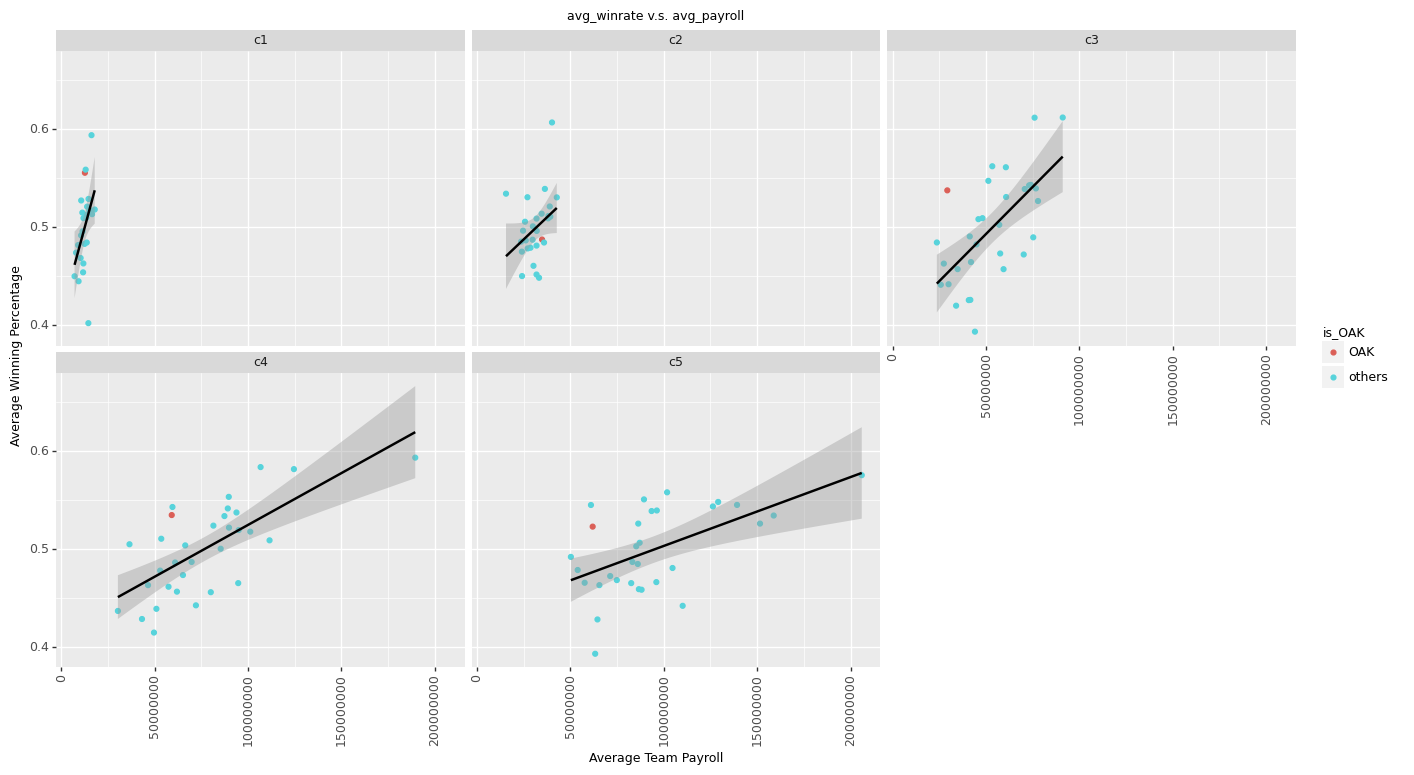

<ggplot: (91497004165)>

In [34]:
Table_catergories["is_OAK"] = 0
for index,row in Table_catergories.iterrows(): 
    #print ("yes")
    if row["teamID"] == "OAK": 
        Table_catergories.loc[index , "is_OAK"] = "OAK"
    else: 
        Table_catergories.loc[index , "is_OAK"] = "others"

#Table_catergories
ggplot(Table_catergories,aes(x='avg_payroll',y = 'avg_winrate')) +\
    geom_point(aes(color='is_OAK')) +\
    facet_wrap('year_catergories') +\
    xlab("Average Team Payroll") +\
    ylab("Average Winning Percentage") +\
    geom_smooth(method = 'lm',color = "black") +\
    ggtitle("avg_winrate v.s. avg_payroll") + theme(text = element_text(size = 9), figure_size=(16, 8),axis_text_x = element_text(angle=90, vjust=1))

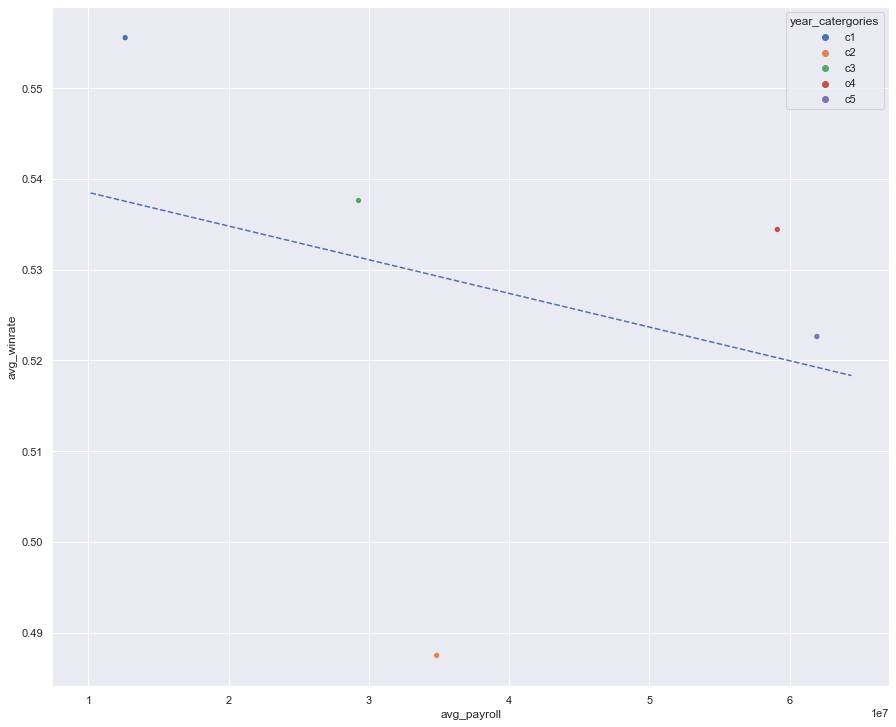

In [35]:
seaborn.scatterplot(x="avg_payroll",
                    y="avg_winrate",
                    hue="year_catergories",
                    #style="event",
                    data=OAK_table)


def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
import numpy as np    
z = np.polyfit(OAK_table["avg_payroll"], OAK_table["avg_winrate"], 1)
#y = z[0]*x + z[1]
#plt.scatter(OAK_table["avg_payroll"], OAK_table["avg_winrate"])
abline(z[0], z[1])
plt.show()
#print(z)

Question 2 

What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).

While the year range change over time, the regression line for later period get less steep than regression line from earlier period. The payroll for each team increased over time and the average payroll of each team in each period increase over period. Teams such as NYA and BOS is good at paying for wins across thees period. For OAK, for the graph above, I can see OAK made a bad choice during period 2 and for the rest of the period, OAK had good spending efficency. 

Problem 5


Create a new variable in your dataset that standardizes payroll conditioned on year. So, this column for team i in year j should equal:

sdlized ij = (payrollij - ave_payrollj)/sd j

for team i in year j.where avg_payrollj is the average payroll for year j, and sj is the standard deviation of payroll for year j.

Problem 6

Repeat the same plots as Problem 4, but use this new standardized payroll variable.



In [36]:
year_different_table = dict(tuple(salary_win_rate_table.groupby("yearID")))
#display(year_different_table)
year_key = year_different_table.keys()
year_mean_sd = [] 
for i in year_key: 
    temp_table = year_different_table[i]
    """
    summ = 0
    team_num = 0
    for index, row in temp_table.iterrows(): 
        summ += row["total_payroll"]
        team_num += 1
    year_average.append([i,summ/team_num])
    """
    mean = temp_table["total_payroll"].mean()
    sd = temp_table["total_payroll"].std()
    year_mean_sd.append([i,mean, sd])
#print(year_mean_sd)

def stardard_func(x, mean, sd):
    return ((x-mean)/sd)
standardlized_salary_table = salary_win_rate_table.copy()
# create new col 
standardlized_salary_table["year_avg"] = 0
standardlized_salary_table["year_sd"] = 0
standardlized_salary_table["standarlized_payroll"] = 0

#display(standardlized_salary_table)  
for index,row in standardlized_salary_table.iterrows(): 
    year = row["yearID"]
    for i in year_mean_sd:
        if i[0] == year: 
            #print ("yes")
            standardlized_salary_table.loc[index,"year_avg"] = i[1]
            standardlized_salary_table.loc[index,"year_sd"] = i[2]
            standardlized_salary_table.loc[index,"standarlized_payroll"] = stardard_func(row["total_payroll"],i[1],i[2])

display(standardlized_salary_table)    

yearID teamID franchID    G    W  win_rate  total_payroll      year_avg  \
0      1985    ATL      ATL  162   66  0.407407     14807000.0  1.007557e+07   
1      1985    BAL      BAL  161   83  0.515528     11560712.0  1.007557e+07   
2      1985    BOS      BOS  163   81  0.496933     10897560.0  1.007557e+07   
3      1985    CAL      ANA  162   90  0.555556     14427894.0  1.007557e+07   
4      1985    CHA      CHW  163   85  0.521472      9846178.0  1.007557e+07   
5      1985    CHN      CHC  162   77  0.475309     12702917.0  1.007557e+07   
6      1985    CIN      CIN  162   89  0.549383      8359917.0  1.007557e+07   
7      1985    CLE      CLE  162   60  0.370370      6551666.0  1.007557e+07   
8      1985    DET      DET  161   84  0.521739     10348143.0  1.007557e+07   
9      1985    HOU      HOU  162   83  0.512346      9993051.0  1.007557e+07   
10     1985    KCA      KCR  162   91  0.561728      9321179.0  1.007557e+07   
11     1985    LAN      LAD  162   95  0.586420     10967917.0  1.007557e+07   
12     1985    MIN      MIN  162   77  0.475309      5764821.0  1.007557e+07   
13     1985    ML4      MIL  161   71  0.440994     11284107.0  1.007557e+07   
14     1985    MON      WSN  161   84  0.521739      9470166.0  1.007557e+07   
15     1985    NYA      NYY  161   97  0.602484     14238204.0  1.007557e+07   
16     1985    NYN      NYM  162   98  0.604938     10834762.0  1.007557e+07   
17     1985    OAK      OAK  162   77  0.475309      9058606.0  1.007557e+07   
18     1985    PHI      PHI  162   75  0.462963     10124966.0  1.007557e+07   
19     1985    PIT      PIT  161   57  0.354037      9227500.0  1.007557e+07   
20     1985    SDN      SDP  162   83  0.512346     11036583.0  1.007557e+07   
21     1985    SEA      SEA  162   74  0.456790      4613000.0  1.007557e+07   
22     1985    SFN      SFG  162   62  0.382716      8221714.0  1.007557e+07   
23     1985    SLN      STL  162  101  0.623457     11817083.0  1.007557e+07   
24     1985    TEX      TEX  161   62  0.385093      7676500.0  1.007557e+07   
25     1985    TOR      TOR  161   99  0.614907      8812550.0  1.007557e+07   
26     1986    ATL      ATL  161   72  0.447205     17102786.0  1.184056e+07   
27     1986    BAL      BAL  162   73  0.450617     13001258.0  1.184056e+07   
28     1986    BOS      BOS  161   95  0.590062     14402239.0  1.184056e+07   
29     1986    CAL      ANA  162   92  0.567901     14427258.0  1.184056e+07   
30     1986    CHA      CHW  162   72  0.444444     10418819.0  1.184056e+07   
31     1986    CHN      CHC  160   70  0.437500     17208165.0  1.184056e+07   
32     1986    CIN      CIN  162   86  0.530864     11906388.0  1.184056e+07   
33     1986    CLE      CLE  163   84  0.515337      7809500.0  1.184056e+07   
34     1986    DET      DET  162   87  0.537037     12335714.0  1.184056e+07   
35     1986    HOU      HOU  162   96  0.592593      9873276.0  1.184056e+07   
36     1986    KCA      KCR  162   76  0.469136     13043698.0  1.184056e+07   
37     1986    LAN      LAD  162   73  0.450617     14913776.0  1.184056e+07   
38     1986    MIN      MIN  162   71  0.438272      8748167.0  1.184056e+07   
39     1986    ML4      MIL  161   77  0.478261      9943642.0  1.184056e+07   
40     1986    MON      WSN  161   78  0.484472     11103600.0  1.184056e+07   
41     1986    NYA      NYY  162   90  0.555556     18494253.0  1.184056e+07   
42     1986    NYN      NYM  162  108  0.666667     15393714.0  1.184056e+07   
43     1986    OAK      OAK  162   76  0.469136      9779421.0  1.184056e+07   
44     1986    PHI      PHI  161   86  0.534161     11590166.0  1.184056e+07   
45     1986    PIT      PIT  162   64  0.395062     10843500.0  1.184056e+07   
46     1986    SDN      SDP  162   74  0.456790     11380693.0  1.184056e+07   
47     1986    SEA      SEA  162   67  0.413580      5958309.0  1.184056e+07   
48     1986    SFN      SFG  162   83  0.512346      8947000.0  1.184056e+07   
49   

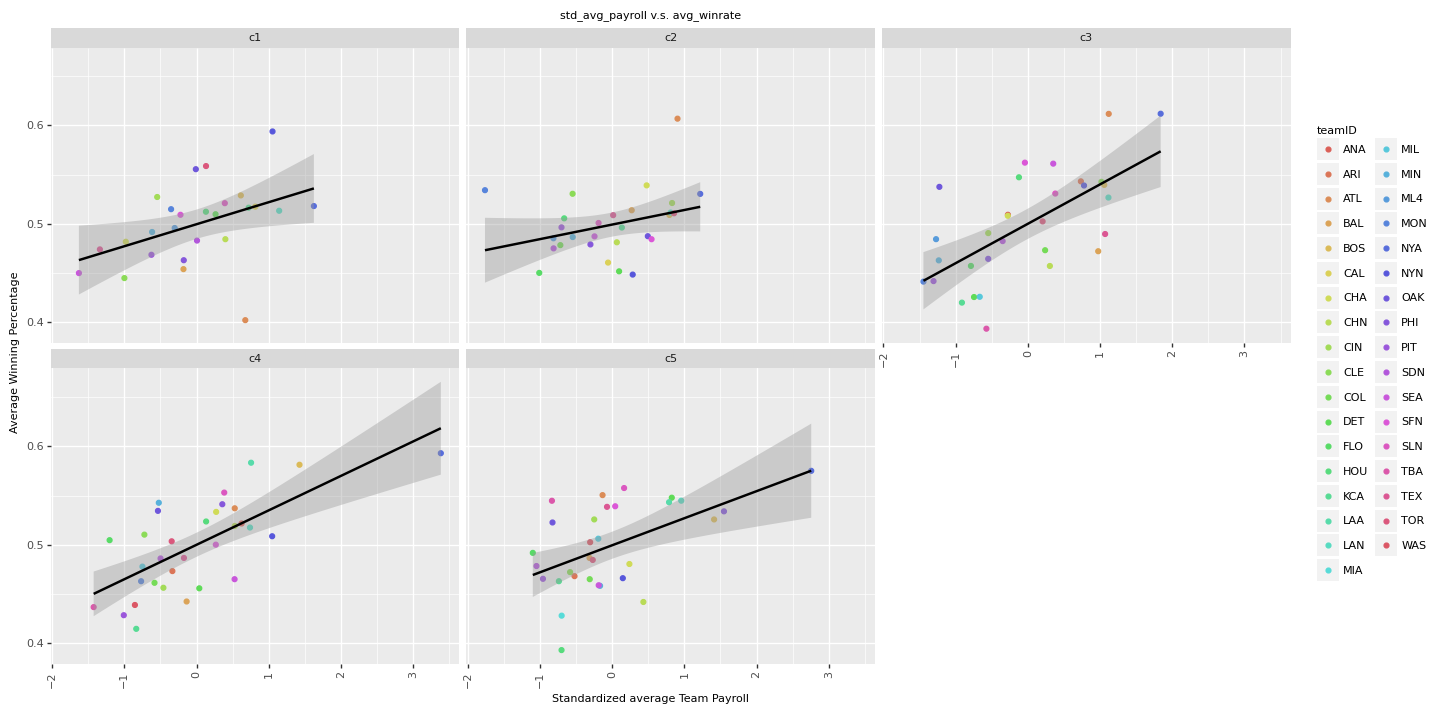

<ggplot: (91498521037)>

In [37]:
"""
subsitude salary_win_rate_table as standardlized_salary_table 
sw_table = salary_win_rate_table.copy()

#sw_table["year_catergories"] = pd.cut(x = sw_table.yearID, 5 , labels = ["c1","c2","c3","c4","c5"])
#sw_table["year_catergories"] = sw_table.cut(x = sw_table['yearID'])
sw_table["year_catergories"] = pd.cut(x = sw_table["yearID"], bins = 5 , labels = ["c1","c2","c3","c4","c5"])
catergories_table = dict(tuple(sw_table.groupby("teamID")))
team_key = catergories_table.keys()
each_team_each_catergories = []
#print(team_key)
for i in team_key:
    #print(i)
    t_table = catergories_table[i]
    temp_table = dict(tuple(t_table.groupby("year_catergories")))
    #display(temp_table)
    temp_key = temp_table.keys()
    #each_team_catergories = []
    for j in temp_key: 
        tt_table = temp_table[j]
        sum_of_each_year = 0 
        sum_of_win_rate = 0
        row_num = 0
        if tt_table.empty: 
            continue
        else: 
            for index, row in tt_table.iterrows(): 
                sum_of_each_year += row["total_payroll"]
                sum_of_win_rate += row["win_rate"]
                row_num +=1
        #each_team_catergories.append([tt_table["teamID"].unique()[0],sum_of_each_year/row_num,sum_of_win_rate/row_num,j])
        each_team_each_catergories.append([tt_table["teamID"].unique()[0],sum_of_each_year/row_num,sum_of_win_rate/row_num,j])
    #each_team_each_catergories.append(each_team_catergories)
#print(each_team_each_catergories)
Table_catergories = pd.DataFrame(each_team_each_catergories, columns = ["teamID", "avg_payroll", "avg_winrate", "year_catergories"])
display(Table_catergories)
"""

sw_table_sd = standardlized_salary_table.copy()
sw_table_sd["year_catergories"] = pd.cut(x = sw_table_sd["yearID"], bins = 5 , labels = ["c1","c2","c3","c4","c5"])
catergories_table_sd = dict(tuple(sw_table_sd.groupby("teamID")))
#display(catergories_table_sd)
team_key_sd = catergories_table_sd.keys()
each_team_each_catergories_sd = []
for i in team_key_sd:
    t_table = catergories_table_sd[i]
    temp_table = dict(tuple(t_table.groupby("year_catergories")))
    temp_key = temp_table.keys()
    for j in temp_key: 
        tt_table = temp_table[j]
        sum_of_each_year = 0 
        sum_of_win_rate = 0
        row_num = 0
        if tt_table.empty: 
            continue
        else: 
            for index, row in tt_table.iterrows(): 
                sum_of_each_year += row["standarlized_payroll"]
                sum_of_win_rate += row["win_rate"]
                row_num +=1
        each_team_each_catergories_sd.append([tt_table["teamID"].unique()[0],sum_of_each_year/row_num,sum_of_win_rate/row_num,j])
Table_catergories_sd = pd.DataFrame(each_team_each_catergories_sd, columns = ["teamID", "std_avg_payroll", "avg_winrate", "year_catergories"])
#Table_catergories_sd
ggplot(Table_catergories_sd,aes(x='std_avg_payroll',y = 'avg_winrate')) +\
    geom_point(aes(color='teamID')) +\
    facet_wrap('year_catergories') +\
    xlab("Standardized average Team Payroll") +\
    ylab("Average Winning Percentage") +\
    geom_smooth(method = 'lm',color = "black") +\
    ggtitle("std_avg_payroll v.s. avg_winrate") + theme(text = element_text(size = 8), figure_size=(16, 8),axis_text_x = element_text(angle=90, vjust=1))

Question 3


Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.


New graph shows standardized payroll which means mean payroll center the data at 0 and the standard deviation has been change to 1. 

The biggest advagntage of these graph is creating a scale of data. In question 4, the data is hard to interpret since the mean and standard deviation is different for each sample in each period. After standardlized the data, it is easier to observe how data change in different period. 

Problem 7

Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). Add a regression line to highlight the relationship.


The regression line gives you expected winning percentage as a function of standardized payroll. Looking at the regression line, it looks like teams that spend roughly the average payroll in a given year will win 50% of their games (i.e. win_pct is 50 when standardized_payroll is 0), and teams increase 5% wins for every 2 standard units of payroll (i.e., win_pct is 55 when standardized_payroll is 2). We will see how this is done in general using linear regression later in the course.


From these observations we can calculate the expected win percentage for team i in year j as

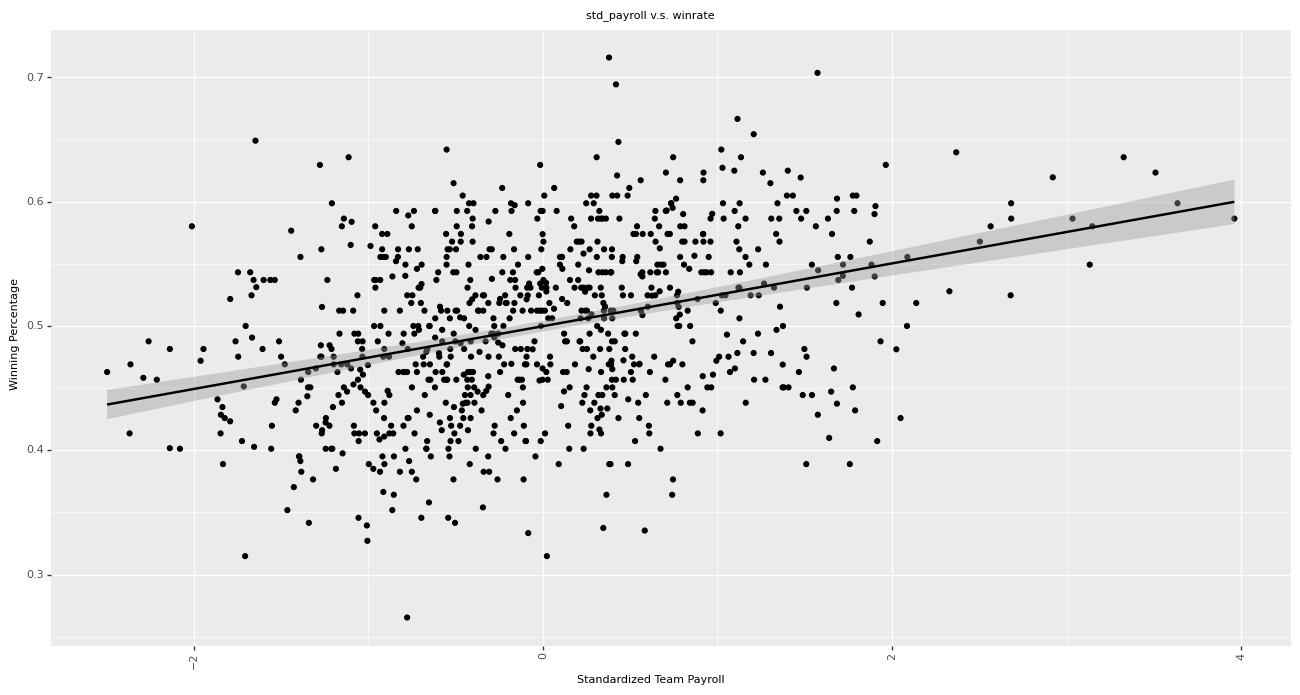

<ggplot: (91496102376)>

In [38]:
ggplot(sw_table_sd,aes(x='standarlized_payroll',y = 'win_rate')) +\
    geom_point() +\
    xlab("Standardized Team Payroll") +\
    ylab("Winning Percentage") +\
    geom_smooth(method = 'lm',color = "black") +\
    ggtitle("std_payroll v.s. winrate") + theme(text = element_text(size = 8), figure_size=(16, 8),axis_text_x = element_text(angle=90, vjust=1))

In [39]:
slope,intercept = np.polyfit(sw_table_sd["standarlized_payroll"], sw_table_sd["win_rate"], 1)
print(slope*100)
print(intercept*100)

2.5269495394885744
49.984051861166506


Problem 8


Make a line plot with year on the x-axis and efficiency on the y-axis. A good set of teams to plot are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA).

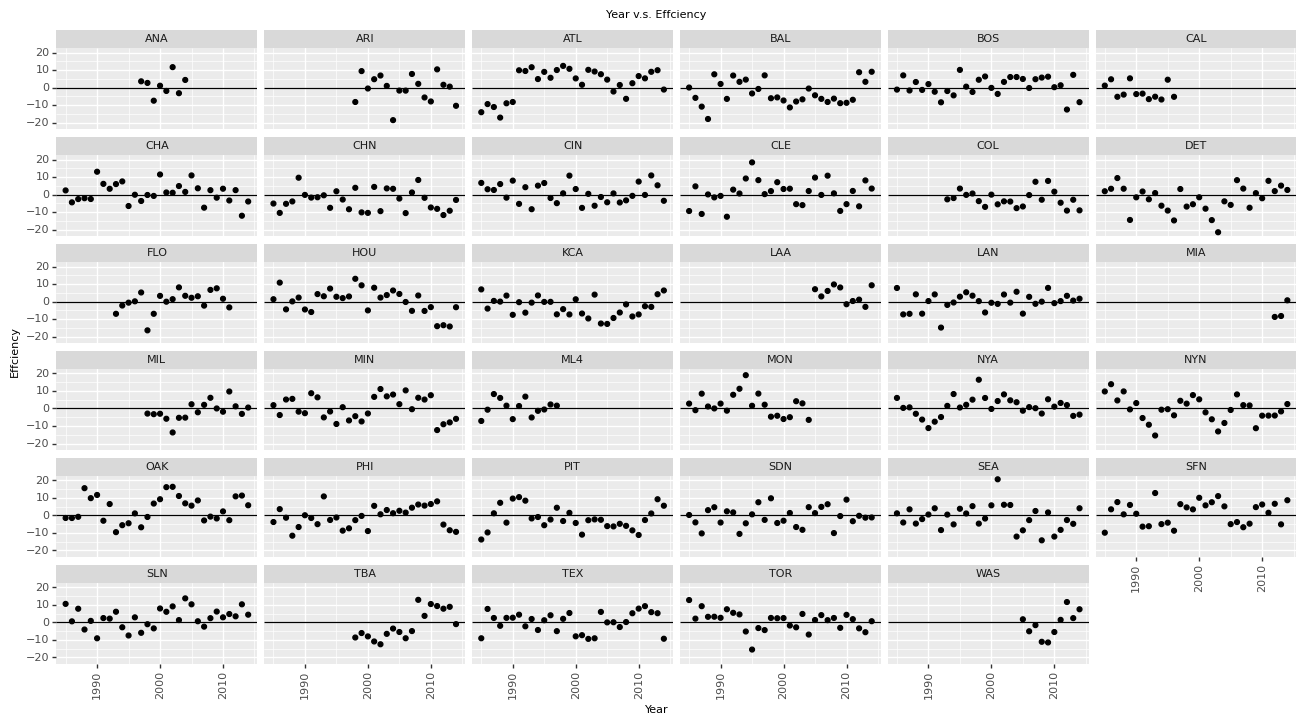

<ggplot: (91498625386)>

In [40]:
effciency_table = sw_table_sd.copy()
effciency_table["effciency"] = 0
for index, row in effciency_table.iterrows(): 
    effciency_table.loc[index,"effciency"] = row["win_rate"]*100 - (50+2.5*row["standarlized_payroll"])
effciency_table

ggplot(effciency_table,aes(x='yearID',y = 'effciency')) +\
    geom_point() +\
    geom_hline(yintercept = 0)+\
    facet_wrap('teamID') +\
    xlab("Year") +\
    ylab("Effciency") +\
    ggtitle("Year v.s. Effciency") + theme(text = element_text(size = 8), figure_size=(16, 8),axis_text_x = element_text(angle=90, vjust=1))

Question 4


What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3? How good was Oakland's efficiency during the Moneyball period?


Compared to question 2 and 3 which observe the correlationship between average win rate and average payroll in some period, this polt focus on each efficiency on each year. In this case, I can observe the reason why the win rate in some period is higher than other period and some outliner which significantly infulenced the data but cannot discoverd by correlationship between average win rate and average payroll in some period. 

OAK at Moneyball period had really high efficiency which was the best efficiency over all period. For OAK after Moneyball period which is 2002, the efficiency did drop after the period. However, even the efficiency of OAK dropped after Moneyball period, the efficiency is still around 0. 